In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/nursnaaz/DataSciencewithPractical/main/07.%20Naive%20Bayes/diabetes.csv')

In [3]:
data.shape

(768, 9)

In [4]:
data.describe(include='all')

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Number of times pregnant       768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8    Class variable                768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [6]:
x = data.iloc[:,:-1]

In [7]:
x.head(5)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
y = data.iloc[:,-1]

In [9]:
y.head(5)

0    YES
1     NO
2    YES
3     NO
4    YES
Name:  Class variable, dtype: object

In [10]:
# x_train = 70% of the independent variables
# x_test = 30% of the indepenent variables
# y_train = 70% of the outcome
# y_test = 30% of the outcome
# test_size = .3 indicates that 30% will be the test volume and 70% will be the train volume
# random_state = arbitrary argument which fixes the random sampling within the input dataset

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=11)

In [12]:
x_train.shape

(537, 8)

In [13]:
y_train.shape

(537,)

In [14]:
x_test.shape

(231, 8)

In [15]:
y_test.shape

(231,)

In [16]:
model = GaussianNB()

In [17]:
# Fit the test data within the Gaussian Naive Bayes 
model.fit(x_train,y_train)

GaussianNB()

In [18]:
y_pred = model.predict(x_test)

In [20]:
accuracy_score(y_pred, y_test)

0.7705627705627706

In [21]:
confusion_matrix(y_test, y_pred)

array([[129,  20],
       [ 33,  49]])

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          NO       0.80      0.87      0.83       149
         YES       0.71      0.60      0.65        82

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



In [24]:
from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


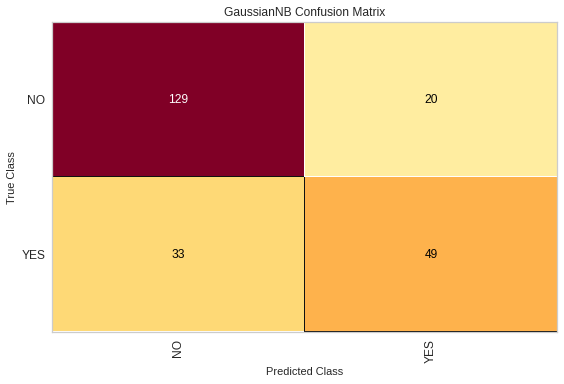

In [25]:
cm = ConfusionMatrix(model, classes=['NO','YES'])
cm.fit(x_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(x_test, y_test)
cm.show()